In [1]:
import os 
import sys 

import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
DATASETS = {
    "UCLA LDCTs": '/workspace/home/tengyuezhang/sybil_cect/results/ucla_ldct/ucla_ldct_20_raw_features.csv',
    "UCLA CECTs": '/workspace/home/tengyuezhang/sybil_cect/results/ucla_cect/ucla_cect_98_raw_features.csv',
    "NLST LDCTs": '/workspace/home/tengyuezhang/sybil_cect/results/nlst_baseline/nlst_raw_features.csv',
    "LUNGx CECTs": '/workspace/home/tengyuezhang/sybil_cect/results/lungx/lungx_features.csv'
}

In [4]:
# Load and concatenate datasets
dfs = []
for dataset_name, path in DATASETS.items():
    df = pd.read_csv(path)
    df['dataset_name'] = dataset_name

    dfs.append(df)

In [5]:
# Combine all datasets into one DataFrame
all_data = pd.concat(dfs, axis=0)

# Extract features
feature_columns = [col for col in all_data.columns if col.startswith("feature_")]
features = all_data[feature_columns].values

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(features)

# Add t-SNE results to the DataFrame
all_data["tsne_1"] = tsne_results[:, 0]
all_data["tsne_2"] = tsne_results[:, 1]

/home/tengyuezhang/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tengyuezhang/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


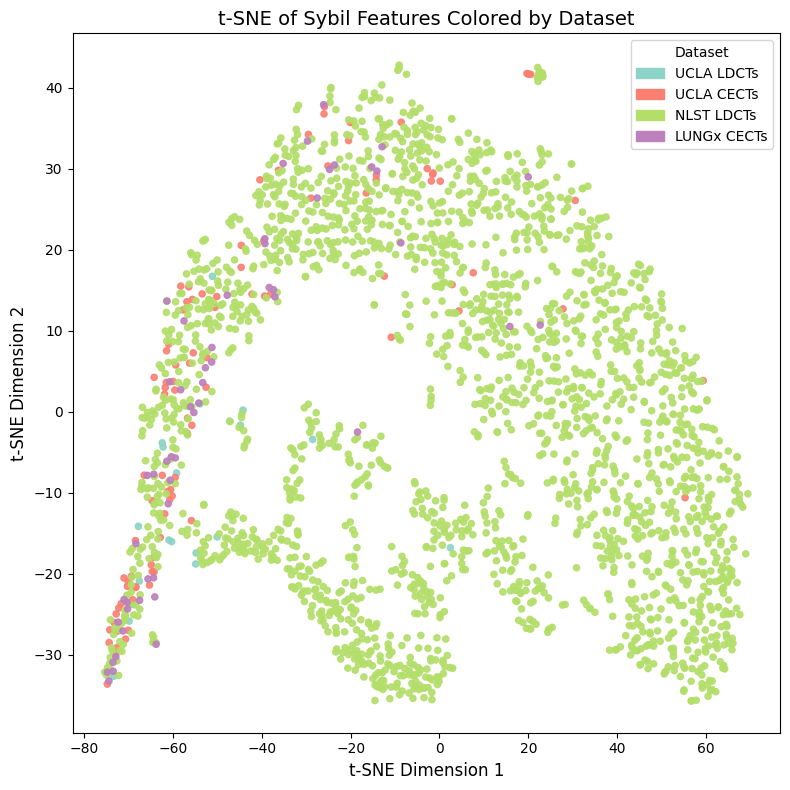

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Map dataset names to colors using a visually distinct colormap (tab20)
unique_datasets = all_data['dataset_name'].unique()
dataset_color_map = {name: plt.cm.Set3(idx / len(unique_datasets)) for idx, name in enumerate(unique_datasets)}

# Assign colors based on dataset name
all_data['color'] = all_data['dataset_name'].map(dataset_color_map)

# Plot t-SNE colored by dataset name
plt.figure(figsize=(8, 8))
scatter = plt.scatter(
    all_data["tsne_1"], 
    all_data["tsne_2"], 
    c=all_data['color'], 
    s=20,  # Increased point size for better visibility
    alpha=0.9,
)

# Add legend
legend_handles = [
    mpatches.Patch(color=color, label=name) for name, color in dataset_color_map.items()
]
plt.legend(handles=legend_handles, title="Dataset", loc="upper right", fontsize=10)

plt.title("t-SNE of Sybil Features Colored by Dataset", fontsize=14)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.tight_layout()
plt.show()
